In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/nasa.csv')

In [ ]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

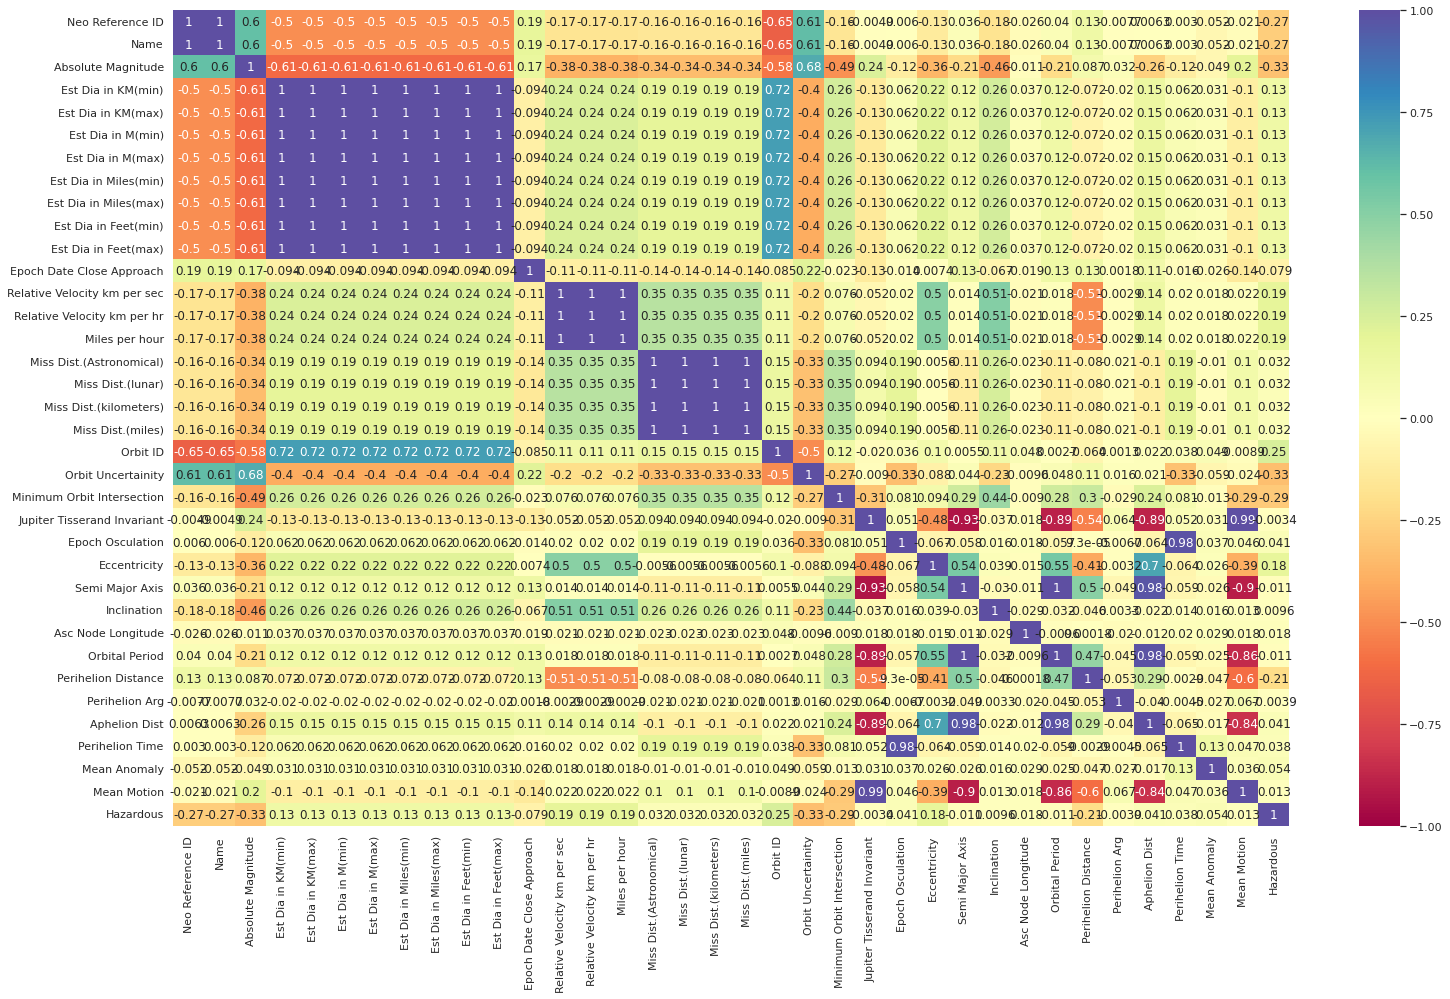

In [ ]:
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

In [ ]:
# Dropping completely correlated features and datetime features
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date','Equinox','Orbiting Body'],axis=1)



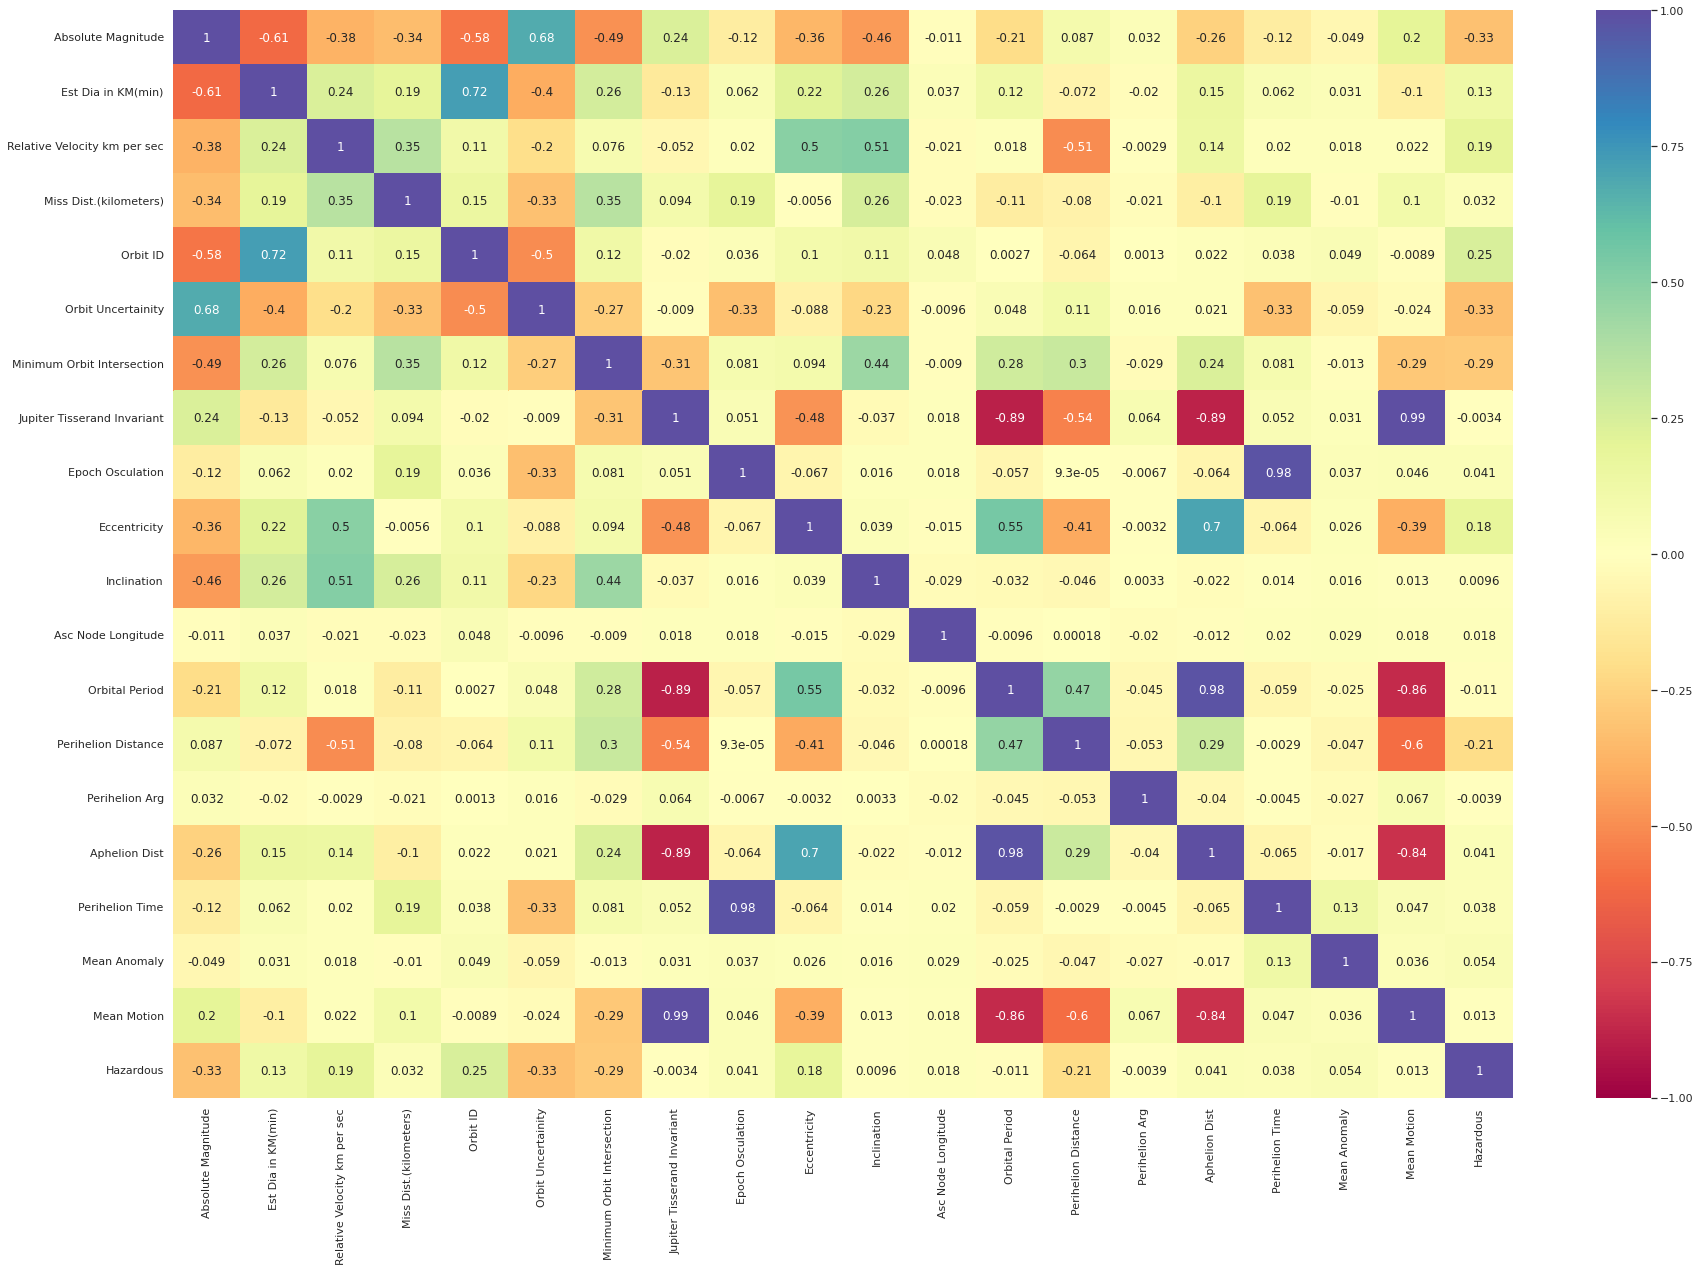

In [ ]:
# Plotting feature correlation with reduced dataset
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

In [ ]:
df.shape


(4687, 20)

In [ ]:
#encoding the y variable
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
df['hazardous'] = l_enc.fit_transform(df.Hazardous)

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,hazardous
0,21.6,0.127220,6.115834,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True,1
1,21.3,0.146068,18.113985,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False,0
2,20.3,0.231502,7.590711,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True,1
3,27.4,0.008801,11.173874,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False,0
4,21.6,0.127220,9.840831,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True,1


In [ ]:
df=df.drop(['Hazardous'],axis=1)

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,hazardous
0,21.6,0.127220,6.115834,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values
Y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

X=sst.fit_transform(X)


In [ ]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1,shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
print("predicted value for training data",model.score(x_train,y_train))
print("predicted value for testing data",model.score(x_test,y_test))


predicted value for training data 0.95492131234996
predicted value for testing data 0.9573560767590619


In [ ]:
accuracy=model.score(X,Y)*100
print(accuracy)

95.54085769148709


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = model.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
print("predicted value for training data",model2.score(x_train,y_train))
print("predicted value for testing data",model2.score(x_test,y_test))


predicted value for training data 1.0
predicted value for testing data 0.9946695095948828


In [ ]:
accuracy=model2.score(X,Y)*100
print(accuracy)

99.8933219543418


In [ ]:
from sklearn.naive_bayes import GaussianNB
Model3 = GaussianNB()
Model3.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred3 = model.predict(x_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
print("predicted value for training data",Model3.score(x_train,y_train))
print("predicted value for testing data",Model3.score(x_test,y_test))


predicted value for training data 0.948252867431315
predicted value for testing data 0.9477611940298507


In [ ]:
accuracy=Model3.score(X,Y)*100
print(accuracy)

94.8154469810113


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
model4.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
print("predicted value for training data",model4.score(x_train,y_train))
print("predicted value for testing data",model4.score(x_test,y_test))


predicted value for training data 0.9407842091224327
predicted value for testing data 0.8955223880597015


In [ ]:
accuracy=model4.score(X,Y)*100
print(accuracy)

93.17260507787498


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
y_pred5 = model5.predict(x_test)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
print("predicted value for training data",model5.score(x_train,y_train))
print("predicted value for testing data",model5.score(x_test,y_test))


predicted value for training data 1.0
predicted value for testing data 0.9957356076759062


In [ ]:
accuracy=model5.score(X,Y)*100
print(accuracy)

99.91465756347344


* frontend
 html css javascript react
 backend
 sql,mongodb,node js api
 


